In [205]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [207]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [208]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 2048


In [209]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 80 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                            1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                                  1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01               1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01                   1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                            1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03    

In [210]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" not in col and "shots" not in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/epochs-01',
 'Qwen/Qwen2-72B-Instruct/epochs-02',
 'Qwen/Qwen2-72B-Instruct/epochs-03',
 'Qwen/Qwen2-72B-Instruct/epochs-04',
 'Qwen/Qwen2-72B-Instruct/epochs-05',
 'Qwen/Qwen2-72B-Instruct/epochs-06',
 'Qwen/Qwen2-7B-Instruct/epochs-01',
 'Qwen/Qwen2-7B-Instruct/epochs-02',
 'Qwen/Qwen2-7B-Instruct/epochs-03',
 'Qwen/Qwen2-7B-Instruct/epochs-04',
 'Qwen/Qwen2-7B-Instruct/epochs-05',
 'Qwen/Qwen2-7B-Instruct/epochs-06',
 'internlm/internlm2_5-7b-chat/epochs-01',
 'internlm/internlm2_5-7b-chat/epochs-02',
 'internlm/internlm2_5-7b-chat/epochs-03',
 'internlm/internlm2_5-7b-chat/epochs-04',
 'internlm/internlm2_5-7b-chat/epochs-05',
 'internlm/internlm2_5-7b-chat/epochs-06',
 'microsoft/Phi-3.5-mini-instruct/epochs-01',
 'microsoft/Phi-3.5-mini-instruct/epochs-02',
 'microsoft/Phi-3.5-mini-instruct/epochs-03',
 'microsoft/Phi-3.5-mini-instruct/epochs-04',
 'microsoft/Phi-3.5-mini-instruct/epochs-05',
 'microsoft/Phi-3.5-mini-instruct/epochs-06',
 'shenzhi-wang/L

In [211]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [212]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "epochs" in col]
openai_cols

['gpt-4o-mini/epochs-01',
 'gpt-4o-mini/epochs-02',
 'gpt-4o-mini/epochs-03',
 'gpt-4o-mini/epochs-04',
 'gpt-4o-mini/epochs-05',
 'gpt-4o-mini/epochs-06',
 'gpt-4o/epochs-01',
 'gpt-4o/epochs-02',
 'gpt-4o/epochs-03',
 'gpt-4o/epochs-04',
 'gpt-4o/epochs-05']

In [213]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/epochs-01',
  'Qwen/Qwen2-72B-Instruct/epochs-02',
  'Qwen/Qwen2-72B-Instruct/epochs-03',
  'Qwen/Qwen2-72B-Instruct/epochs-04',
  'Qwen/Qwen2-72B-Instruct/epochs-05',
  'Qwen/Qwen2-72B-Instruct/epochs-06',
  'Qwen/Qwen2-7B-Instruct/epochs-01',
  'Qwen/Qwen2-7B-Instruct/epochs-02',
  'Qwen/Qwen2-7B-Instruct/epochs-03',
  'Qwen/Qwen2-7B-Instruct/epochs-04',
  'Qwen/Qwen2-7B-Instruct/epochs-05',
  'Qwen/Qwen2-7B-Instruct/epochs-06',
  'internlm/internlm2_5-7b-chat/epochs-01',
  'internlm/internlm2_5-7b-chat/epochs-02',
  'internlm/internlm2_5-7b-chat/epochs-03',
  'internlm/internlm2_5-7b-chat/epochs-04',
  'internlm/internlm2_5-7b-chat/epochs-05',
  'internlm/internlm2_5-7b-chat/epochs-06',
  'microsoft/Phi-3.5-mini-instruct/epochs-01',
  'microsoft/Phi-3.5-mini-instruct/epochs-02',
  'microsoft/Phi-3.5-mini-instruct/epochs-03',
  'microsoft/Phi-3.5-mini-instruct/epochs-04',
  'microsoft/Phi-3.5-mini-instruct/epochs-05',
  'microsoft/Phi-3.5-mini-instruct/epoc

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   chinese                                              1133 non-null   object
 1   english                                              1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/epochs-01                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/epochs-02                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/epochs-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/epochs-04                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/epochs-05                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/epochs-06                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/epochs-01                     1133 non-null   object
 9

In [215]:
variant = "epochs"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'microsoft/Phi-3.5-mini-instruct'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini' 'gpt-4o']
Qwen/Qwen2-72B-Instruct/epochs-01: {'meteor': 0.4689894616957893, 'sacrebleu': {'score': 18.065844028552757, 'counts': [14500, 6569, 3558, 2049], 'totals': [27672, 26539, 25408, 24278], 'precisions': [52.39953743856606, 24.75225140359471, 14.003463476070529, 8.43973968201664], 'bp': 0.9130227260435708, 'sys_len': 27672, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18065844028552755, 'precisions': [0.5239953743856606, 0.2475225140359471, 0.1400346347607053, 0.0843973968201664], 'brevity_penalty': 0.9130227260435708, 'length_ratio': 0.9165948989731699, 'translation_length': 27672, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.5032766897887753, 'rouge2': 0.26083423405260786, 'rougeL': 0.4475962917769797, 'rougeLs

/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-03: {'meteor': 0.402731293761545, 'sacrebleu': {'score': 13.298445922298715, 'counts': [12731, 5011, 2437, 1313], 'totals': [27407, 26274, 25144, 24015], 'precisions': [46.451636443244425, 19.072086473319633, 9.69217308304168, 5.4674161982094525], 'bp': 0.9034419679166117, 'sys_len': 27407, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13298445922298713, 'precisions': [0.46451636443244426, 0.19072086473319633, 0.0969217308304168, 0.05467416198209452], 'brevity_penalty': 0.9034419679166117, 'length_ratio': 0.9078171579993375, 'translation_length': 27407, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4347623819339725, 'rouge2': 0.19996148256843232, 'rougeL': 0.38021029643117604, 'rougeLsum': 0.37992866588710644}, 'accuracy': 0.01235657546337158, 'correct_ids': [41, 170, 193, 199, 240, 348, 364, 419, 533, 659, 712, 778, 893, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-04: {'meteor': 0.4005844795870538, 'sacrebleu': {'score': 12.830936228203358, 'counts': [12702, 4869, 2317, 1232], 'totals': [28169, 27036, 25906, 24778], 'precisions': [45.092122546061276, 18.009320905459386, 8.94387400602177, 4.972152716119138], 'bp': 0.930767712672891, 'sys_len': 28169, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12830936228203352, 'precisions': [0.45092122546061275, 0.18009320905459386, 0.08943874006021771, 0.04972152716119138], 'brevity_penalty': 0.930767712672891, 'length_ratio': 0.9330573037429613, 'translation_length': 28169, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42836766787512365, 'rouge2': 0.19493952918360233, 'rougeL': 0.371917122401075, 'rougeLsum': 0.3715904974850911}, 'accuracy': 0.01147396293027361, 'correct_ids': [41, 133, 170, 193, 240, 348, 364, 419, 533, 658, 659, 778, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-05: {'meteor': 0.3914924089360312, 'sacrebleu': {'score': 12.389839982209974, 'counts': [12527, 4721, 2221, 1169], 'totals': [28795, 27662, 26531, 25402], 'precisions': [43.504080569543326, 17.066734147928567, 8.371339188119558, 4.601999842532084], 'bp': 0.9527088692219498, 'sys_len': 28795, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12389839982209969, 'precisions': [0.43504080569543324, 0.17066734147928567, 0.08371339188119559, 0.04601999842532084], 'brevity_penalty': 0.9527088692219498, 'length_ratio': 0.9537926465717125, 'translation_length': 28795, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.41749621917319657, 'rouge2': 0.18634872463911994, 'rougeL': 0.3616004177189829, 'rougeLsum': 0.36108461707769735}, 'accuracy': 0.009708737864077669, 'correct_ids': [41, 133, 170, 193, 240, 348, 364, 419, 533, 658, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-06: {'meteor': 0.3843671339870232, 'sacrebleu': {'score': 11.760109889558809, 'counts': [12442, 4511, 2075, 1073], 'totals': [29486, 28353, 27222, 26093], 'precisions': [42.19629654751407, 15.910132966529115, 7.622511204173096, 4.112214003755796], 'bp': 0.9764070328637859, 'sys_len': 29486, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11760109889558817, 'precisions': [0.4219629654751407, 0.15910132966529114, 0.07622511204173095, 0.041122140037557965], 'brevity_penalty': 0.9764070328637862, 'length_ratio': 0.9766810202053661, 'translation_length': 29486, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4090438819710813, 'rouge2': 0.17512800473307188, 'rougeL': 0.35217836060553437, 'rougeLsum': 0.35178655674754}, 'accuracy': 0.00706090026478376, 'correct_ids': [41, 133, 193, 240, 348, 419, 658, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-01: {'meteor': 0.3785370331806402, 'sacrebleu': {'score': 12.052844230027103, 'counts': [12818, 4623, 2153, 1081], 'totals': [29097, 27964, 26850, 25740], 'precisions': [44.05265147609719, 16.53196967529681, 8.018621973929237, 4.1996891996892], 'bp': 0.9631327655852462, 'sys_len': 29097, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12052844230027103, 'precisions': [0.44052651476097193, 0.1653196967529681, 0.08018621973929237, 0.041996891996891994], 'brevity_penalty': 0.9631327655852462, 'length_ratio': 0.9637959589267969, 'translation_length': 29097, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42443047851518106, 'rouge2': 0.17596493152766832, 'rougeL': 0.36957918240806564, 'rougeLsum': 0.36921849634755544}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

gpt-4o-mini/epochs-02: {'meteor': 0.3785921332515917, 'sacrebleu': {'score': 12.033706874864837, 'counts': [12801, 4628, 2150, 1076], 'totals': [29076, 27943, 26830, 25722], 'precisions': [44.02600082542303, 16.562287513867517, 8.013417815877748, 4.183189487598165], 'bp': 0.9624112877781842, 'sys_len': 29076, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12033706874864836, 'precisions': [0.4402600082542303, 0.16562287513867516, 0.08013417815877749, 0.04183189487598165], 'brevity_penalty': 0.9624112877781842, 'length_ratio': 0.9631003643590593, 'translation_length': 29076, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42354000204099773, 'rouge2': 0.17594184965251966, 'rougeL': 0.3692226123830143, 'rougeLsum': 0.36897711811852274}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-03: {'meteor': 0.37736228106121694, 'sacrebleu': {'score': 11.933111335430906, 'counts': [12779, 4601, 2124, 1061], 'totals': [29096, 27963, 26848, 25737], 'precisions': [43.920126477866376, 16.453885491542394, 7.911203814064362, 4.122469596301046], 'bp': 0.9630984208616785, 'sys_len': 29096, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11933111335430906, 'precisions': [0.4392012647786637, 0.16453885491542394, 0.07911203814064362, 0.041224695963010455], 'brevity_penalty': 0.9630984208616785, 'length_ratio': 0.9637628353759523, 'translation_length': 29096, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42336961319155575, 'rouge2': 0.1748520032985133, 'rougeL': 0.3688450537487206, 'rougeLsum': 0.36846273163776855}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-04: {'meteor': 0.37818535038887346, 'sacrebleu': {'score': 11.933285526593995, 'counts': [12797, 4601, 2121, 1061], 'totals': [29110, 27977, 26861, 25749], 'precisions': [43.960838199931295, 16.445651785395146, 7.896206395889952, 4.120548370810517], 'bp': 0.9635791436286372, 'sys_len': 29110, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11933285526593994, 'precisions': [0.43960838199931296, 0.16445651785395146, 0.07896206395889951, 0.041205483708105166], 'brevity_penalty': 0.9635791436286371, 'length_ratio': 0.9642265650877774, 'translation_length': 29110, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42366436952994724, 'rouge2': 0.17495883924544925, 'rougeL': 0.369312643768064, 'rougeLsum': 0.36901428642912754}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-05: {'meteor': 0.3790673551140706, 'sacrebleu': {'score': 11.955698498650582, 'counts': [12808, 4609, 2126, 1064], 'totals': [29209, 28076, 26959, 25846], 'precisions': [43.849498442260945, 16.416156147599374, 7.88604918580066, 4.116691170780778], 'bp': 0.9669721941455759, 'sys_len': 29209, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11955698498650584, 'precisions': [0.4384949844226095, 0.16416156147599373, 0.0788604918580066, 0.041166911707807785], 'brevity_penalty': 0.9669721941455759, 'length_ratio': 0.9675057966213978, 'translation_length': 29209, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.424511337578104, 'rouge2': 0.17552506937019113, 'rougeL': 0.3700516961573066, 'rougeLsum': 0.3697358220137848}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-06: {'meteor': 0.3792226866395673, 'sacrebleu': {'score': 11.982811850915233, 'counts': [12810, 4617, 2137, 1066], 'totals': [29116, 27983, 26868, 25757], 'precisions': [43.996428080780326, 16.499303148340065, 7.95369956825964, 4.138680746981403], 'bp': 0.9637850995333245, 'sys_len': 29116, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11982811850915229, 'precisions': [0.43996428080780325, 0.16499303148340064, 0.0795369956825964, 0.04138680746981403], 'brevity_penalty': 0.9637850995333245, 'length_ratio': 0.9644253063928453, 'translation_length': 29116, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4249704250591366, 'rouge2': 0.17551181343561423, 'rougeL': 0.3702014855827334, 'rougeLsum': 0.369761700076006}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/epochs-01: {'meteor': 0.37829977579665147, 'sacrebleu': {'score': 11.961183004083166, 'counts': [12783, 4604, 2130, 1067], 'totals': [29124, 27991, 26875, 25764], 'precisions': [43.89163576431809, 16.448144046300598, 7.925581395348837, 4.141437664958858], 'bp': 0.9640596438285618, 'sys_len': 29124, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11961183004083172, 'precisions': [0.4389163576431809, 0.16448144046300597, 0.07925581395348837, 0.04141437664958857], 'brevity_penalty': 0.9640596438285618, 'length_ratio': 0.9646902947996026, 'translation_length': 29124, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4242403543899246, 'rouge2': 0.17528495420070284, 'rougeL': 0.36946910655117193, 'rougeLsum': 0.3690721189473155}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

gpt-4o/epochs-02: {'meteor': 0.378362442260616, 'sacrebleu': {'score': 11.94987840396735, 'counts': [12801, 4612, 2127, 1061], 'totals': [29101, 27968, 26852, 25740], 'precisions': [43.98817910037456, 16.490274599542335, 7.9211976761507525, 4.121989121989122], 'bp': 0.9632701331199107, 'sys_len': 29101, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11949878403967351, 'precisions': [0.4398817910037456, 0.16490274599542334, 0.07921197676150753, 0.04121989121989122], 'brevity_penalty': 0.9632701331199107, 'length_ratio': 0.9639284531301755, 'translation_length': 29101, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42418651165894605, 'rouge2': 0.17484325162584516, 'rougeL': 0.3696307163844028, 'rougeLsum': 0.3693171911431391}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/epochs-03: {'meteor': 0.37969689267707335, 'sacrebleu': {'score': 12.039126826084276, 'counts': [12800, 4627, 2152, 1077], 'totals': [29117, 27984, 26868, 25756], 'precisions': [43.9605728612151, 16.53444825614637, 8.009528063123419, 4.181549930113372], 'bp': 0.9638194215435517, 'sys_len': 29117, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1203912682608427, 'precisions': [0.43960572861215097, 0.1653444825614637, 0.08009528063123418, 0.041815499301133714], 'brevity_penalty': 0.9638194215435517, 'length_ratio': 0.9644584299436899, 'translation_length': 29117, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4251167622715958, 'rouge2': 0.1763937968609004, 'rougeL': 0.3708921033232617, 'rougeLsum': 0.37058155037666485}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/epochs-04: {'meteor': 0.3784063502724225, 'sacrebleu': {'score': 11.971696060849887, 'counts': [12785, 4606, 2132, 1069], 'totals': [29104, 27971, 26855, 25743], 'precisions': [43.92866959868059, 16.467055164277287, 7.938931297709924, 4.152585168783747], 'bp': 0.9633731468442895, 'sys_len': 29104, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11971696060849878, 'precisions': [0.4392866959868059, 0.16467055164277286, 0.07938931297709924, 0.04152585168783747], 'brevity_penalty': 0.9633731468442893, 'length_ratio': 0.9640278237827095, 'translation_length': 29104, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42373412940330024, 'rouge2': 0.17494318829505479, 'rougeL': 0.36946917014546865, 'rougeLsum': 0.3692159515811544}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o/epochs-05: {'meteor': 0.3797983554067647, 'sacrebleu': {'score': 12.064338049153614, 'counts': [12791, 4641, 2157, 1081], 'totals': [29111, 27978, 26862, 25750], 'precisions': [43.93871732334856, 16.58803345485739, 8.029930757203484, 4.1980582524271846], 'bp': 0.9636134724514155, 'sys_len': 29111, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12064338049153608, 'precisions': [0.43938717323348564, 0.16588033454857387, 0.08029930757203485, 0.041980582524271844], 'brevity_penalty': 0.9636134724514155, 'length_ratio': 0.9642596886386221, 'translation_length': 29111, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4247452999475729, 'rouge2': 0.17724346092772125, 'rougeL': 0.3708975192815729, 'rougeLsum': 0.37046760421893205}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
1                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
2                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
3                     Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
4                     Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
5                     Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
6                      Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
7                      Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
8                      Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
9                      Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
10                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
11                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
12               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
13               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
14               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
15               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
16               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
17               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
18            microsoft/Phi-3.5-mini-instruct       1  0.346101   9.405371   
19            microsoft/Phi-3.5-mini-instruct       2  0.356541  10.050233   
20            microsoft/Phi-3.5-mini-instruct       3  0.367523  10.688776   
21            microsoft/Phi-3.5-mini-instruct       4  0.378257  11.274744   
22            microsoft/Phi-3.5-mini-instruct       5  0.380318  11.472004   
23            microsoft/Phi-3.5-mini-instruct       6  0.381069  11.286091   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
42                                gpt-4o-mini       1  0.378537  12.052844   
43                                gpt-4o-mini       2  0.378592  12.033707   
44                                gpt-4o-mini       3  0.377362  11.933111   
45                                gpt-4o-mini       4  0.378185  11.933286   
46                                gpt-4o-mini       5  0.379067  11.955698   
47                                gpt-4o-mini       6  0.379223  11.982812   
48                                     gpt-4o       1  0.378300  11.961183   
49                                     gpt-4o       2  0.378362  11.949878   
50                                     gpt-4o       3  0.37969

In [216]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-1.txt
Error processing log file: logs/l40-1gpu-1.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-1gpu-2.txt
Loading content of logs/l40-1gpu-3.txt
Loading content of logs/l40-1gpu-4.txt
Loading content of logs/l40-1gpu-5.txt
Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu-rpp-4.txt
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/l40-4gpu-8.txt
Loading content of logs/openai-gpt-4o-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned

model  epochs  eval_time
0             microsoft/Phi-3.5-mini-instruct       1   1.702560
1             microsoft/Phi-3.5-mini-instruct       2   1.654016
2             microsoft/Phi-3.5-mini-instruct       3   1.641659
3             microsoft/Phi-3.5-mini-instruct       4   1.696381
4             microsoft/Phi-3.5-mini-instruct       5   1.696381
5             microsoft/Phi-3.5-mini-instruct       6   1.701677
6                internlm/internlm2_5-7b-chat       1   1.536628
10               internlm/internlm2_5-7b-chat       2   1.565755
11               internlm/internlm2_5-7b-chat       3   1.598411
12               internlm/internlm2_5-7b-chat       4   1.556929
13               internlm/internlm2_5-7b-chat       5   1.578111
14               internlm/internlm2_5-7b-chat       6   1.556046
15                     Qwen/Qwen2-7B-Instruct       1   1.173875
16                     Qwen/Qwen2-7B-Instruct       2   1.263019
17                     Qwen/Qwen2-7B-Instruct       3   1.269197
18                     Qwen/Qwen2-7B-Instruct       4   1.234775
19                     Qwen/Qwen2-7B-Instruct       5   1.262136
20                     Qwen/Qwen2-7B-Instruct       6   1.238305
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1   1.324801
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2   1.376876
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3   1.372462
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4   1.421006
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5   1.456311
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6   1.497793
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1   1.225949
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2   1.198588
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3   1.234775
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4   1.218888
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5   1.235658
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6   1.230362
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  15.308914
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  15.309797
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  16.096205
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  16.263019
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  16.224184
38     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  16.559576
39                    Qwen/Qwen2-72B-Instruct       1  15.127979
40                    Qwen/Qwen2-72B-Instruct       2  15.532215
41                    Qwen/Qwen2-72B-Instruct       3  15.616064
42                    Qwen/Qwen2-72B-Instruct       4  16.109444
43                    Qwen/Qwen2-72B-Instruct       5  16.624007
44                    Qwen/Qwen2-72B-Instruct       6  16.712268
45                                     gpt-4o       1   1.016770
46                                     gpt-4o       2   0.923213
47                                     gpt-4o       3   0.998235
48                                     gpt-4o       4   0.985878
49                                     gpt-4o       5   1.025596
50                                gpt-4o-mini       1   0.889673
51                                gpt-4o-mini       2   0.949691
52                                gpt-4o-mini       3   0.902030
53                                gpt-4o-mini       4   0.984113
54                                gpt-4o-mini       5   0.835834
55                                gpt-4o-mini       6   0.832304

In [217]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
1                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
2                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
3                     Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
4                     Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
5                     Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
6                      Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
7                      Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
8                      Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
9                      Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
10                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
11                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
12               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
13               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
14               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
15               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
16               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
17               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
18            microsoft/Phi-3.5-mini-instruct       1  0.346101   9.405371   
19            microsoft/Phi-3.5-mini-instruct       2  0.356541  10.050233   
20            microsoft/Phi-3.5-mini-instruct       3  0.367523  10.688776   
21            microsoft/Phi-3.5-mini-instruct       4  0.378257  11.274744   
22            microsoft/Phi-3.5-mini-instruct       5  0.380318  11.472004   
23            microsoft/Phi-3.5-mini-instruct       6  0.381069  11.286091   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
42                                gpt-4o-mini       1  0.378537  12.052844   
43                                gpt-4o-mini       2  0.378592  12.033707   
44                                gpt-4o-mini       3  0.377362  11.933111   
45                                gpt-4o-mini       4  0.378185  11.933286   
46                                gpt-4o-mini       5  0.379067  11.955698   
47                                gpt-4o-mini       6  0.379223  11.982812   
48                                     gpt-4o       1  0.378300  11.961183   
49                                     gpt-4o       2  0.378362  11.949878   
50                                     gpt-4o       3  0.37969

In [218]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini',
       'gpt-4o'], dtype=object)

In [219]:
df_few_shots = pd.read_csv("results/mac-results_few_shots_metrics.csv")
df_few_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        54 non-null     object 
 1   shots                        54 non-null     int64  
 2   meteor                       54 non-null     float64
 3   spbleu                       54 non-null     float64
 4   bleu_1                       54 non-null     float64
 5   rouge_l                      54 non-null     float64
 6   ews_score                    54 non-null     float64
 7   repetition_score             54 non-null     float64
 8   total_repetitions            54 non-null     float64
 9   rap                          54 non-null     float64
 10  num_incomplete_translations  54 non-null     int64  
 11  num_max_output_tokens        54 non-null     int64  
 12  eval_time                    52 non-null     float64
dtypes: float64(9), int64(3

In [220]:
temp = df_few_shots[df_few_shots["model"].isin(models)]
df_base = temp[temp["shots"] == 0].rename(columns={"shots": variant})
df_base

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
6                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
12               internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
18            microsoft/Phi-3.5-mini-instruct       0  0.288749   6.616686   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
42                                gpt-4o-mini       0  0.379770  12.082384   
48                                     gpt-4o       0  0.379742  12.054600   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384692        0.0          0.195940           0.195940   
6   0.117835  0.367905        0.0          0.071492           0.071492   
12  0.113605  0.360267        0.0          0.214475           0.214475   
18  0.066167  0.292031        0.0          0.135922           0.135922   
24  0.108747  0.353357        0.0          0.154457           0.154457   
30  0.097994  0.335269        0.0          2.216240           2.216240   
36  0.083138  0.317988        0.0          0.127979           0.127979   
42  0.120824  0.370822        0.0          0.095322           0.095322   
48  0.120546  0.370589        0.0          0.095322           0.095322   

         rap  num_incomplete_translations  num_max_output_tokens  eval_time  
0   0.397018                           37                      0   8.894969  
6   0.376313                           89                      0   0.980583  
12  0.364806                           10                      0   1.224184  
18  0.287066                           17                      0   0.983230  
24  0.361464                           55                      0   7.833186  
30  0.319818                           16                      0   1.075022  
36  0.326695                           18                      0   1.204766  
42  0.378211                           22                      0   1.593998  
48  0.378184                           26                      0   1.528685

In [221]:
metrics_df = pd.concat([df_base, metrics_df], ignore_index=True)
metrics_df

model  epochs    meteor     spbleu  \
0                  Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
1                   Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
2             internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
3          microsoft/Phi-3.5-mini-instruct       0  0.288749   6.616686   
4   shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
..                                     ...     ...       ...        ...   
57                                  gpt-4o       1  0.378300  11.961183   
58                                  gpt-4o       2  0.378362  11.949878   
59                                  gpt-4o       3  0.379697  12.039127   
60                                  gpt-4o       4  0.378406  11.971696   
61                                  gpt-4o       5  0.379798  12.064338   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384692        0.0          0.195940           0.195940   
1   0.117835  0.367905        0.0          0.071492           0.071492   
2   0.113605  0.360267        0.0          0.214475           0.214475   
3   0.066167  0.292031        0.0          0.135922           0.135922   
4   0.108747  0.353357        0.0          0.154457           0.154457   
..       ...       ...        ...               ...                ...   
57  0.119612  0.369469        0.0          0.095322           0.095322   
58  0.119499  0.369631        0.0          0.095322           0.095322   
59  0.120391  0.370892        0.0          0.095322           0.095322   
60  0.119717  0.369469        0.0          0.095322           0.095322   
61  0.120643  0.370898        0.0          0.095322           0.095322   

         rap  num_incomplete_translations  num_max_output_tokens  eval_time  
0   0.397018                           37                      0   8.894969  
1   0.376313                           89                      0   0.980583  
2   0.364806                           10                      0   1.224184  
3   0.287066                           17                      0   0.983230  
4   0.361464                           55                      0   7.833186  
..       ...                          ...                    ...        ...  
57  0.376748                           24                      0   1.016770  
58  0.376810                           24                      0   0.923213  
59  0.378139                           25                      0   0.998235  
60  0.376854                           24                      0   0.985878  
61  0.378240                           24                      0   1.025596  

[62 rows x 13 columns]

In [222]:
# sort metrics_df by model and epochs
metrics_df.sort_values(["model", variant], inplace=True)
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
9                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
10                    Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
11                    Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
12                    Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
..                                        ...     ...       ...        ...   
46  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
47  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
48  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
49  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
50  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384692        0.0          0.195940           0.195940   
9   0.180658  0.447596        0.0          0.040600           0.040600   
10  0.189790  0.451435        0.0          0.081200           0.081200   
11  0.180662  0.436618        0.0          0.094440           0.094440   
12  0.169756  0.423267        0.0          0.120035           0.120035   
..       ...       ...        ...               ...                ...   
46  0.134685  0.385390        0.0          1.542807           1.542807   
47  0.132984  0.380210        0.0          0.653133           0.653133   
48  0.128309  0.371917        0.0          1.160635           1.160635   
49  0.123898  0.361600        0.0          1.212710           1.212710   
50  0.117601  0.352178        0.0          1.236540           1.236540   

         rap  num_incomplete_translations  num_max_output_tokens  eval_time  
0   0.397018                           37                      0   8.894969  
9   0.468166                            1                      0  15.127979  
10  0.475871                            0                      0  15.532215  
11  0.461171                            2                      0  15.616064  
12  0.451695                           11                      0  16.109444  
..       ...                          ...                    ...        ...  
46  0.381674                            0                      0   1.376876  
47  0.391961                            0                      0   1.372462  
48  0.382351                            0                      0   1.421006  
49  0.372953                            0                      0   1.456311  
50  0.365844                            0                      0   1.497793  

[62 rows x 13 columns]

In [223]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [224]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [248]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
    bbox_to_anchor=None,
    num_x_values=6,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())[:num_x_values]
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for i, x in enumerate(model_df[variant]) if i < num_x_values]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column][:num_x_values],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel(f"Epoch (0: Base, 1-{num_x_values - 1}: Fine-tuned)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    bbox_to_anchor = (
        (0.5, -0.93 if len(columns) > 1 else -0.52)
        if bbox_to_anchor is None
        else bbox_to_anchor
    )

    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=bbox_to_anchor,
    )

    plt.show()

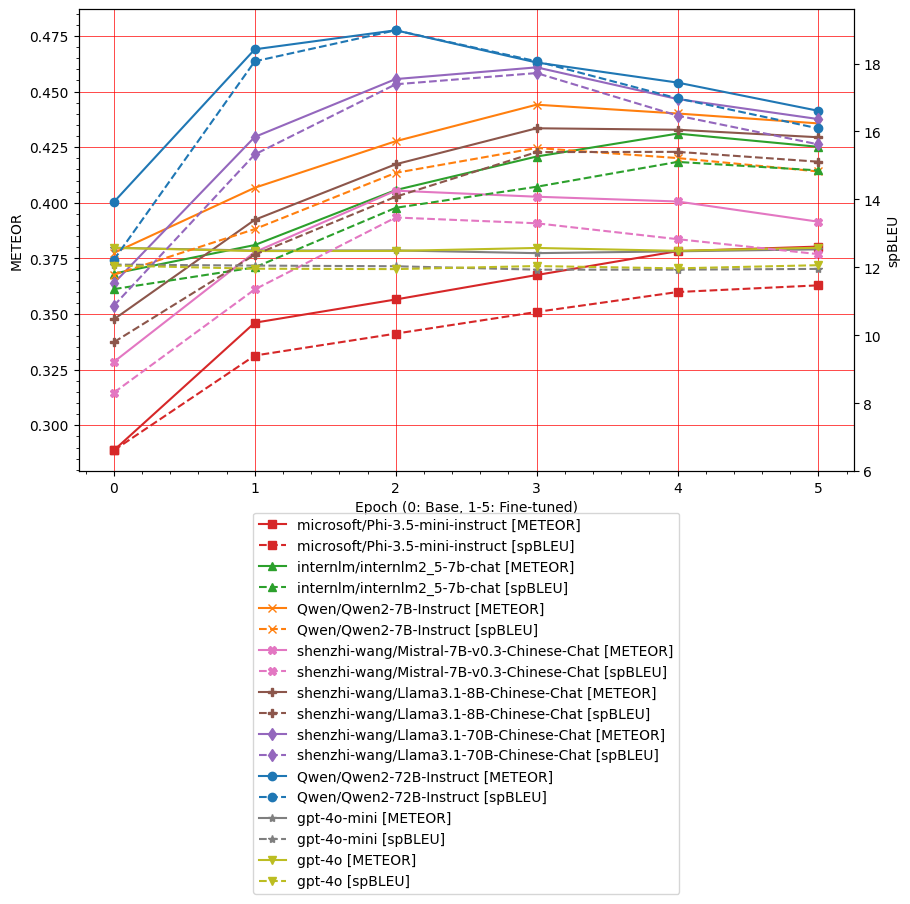

In [249]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

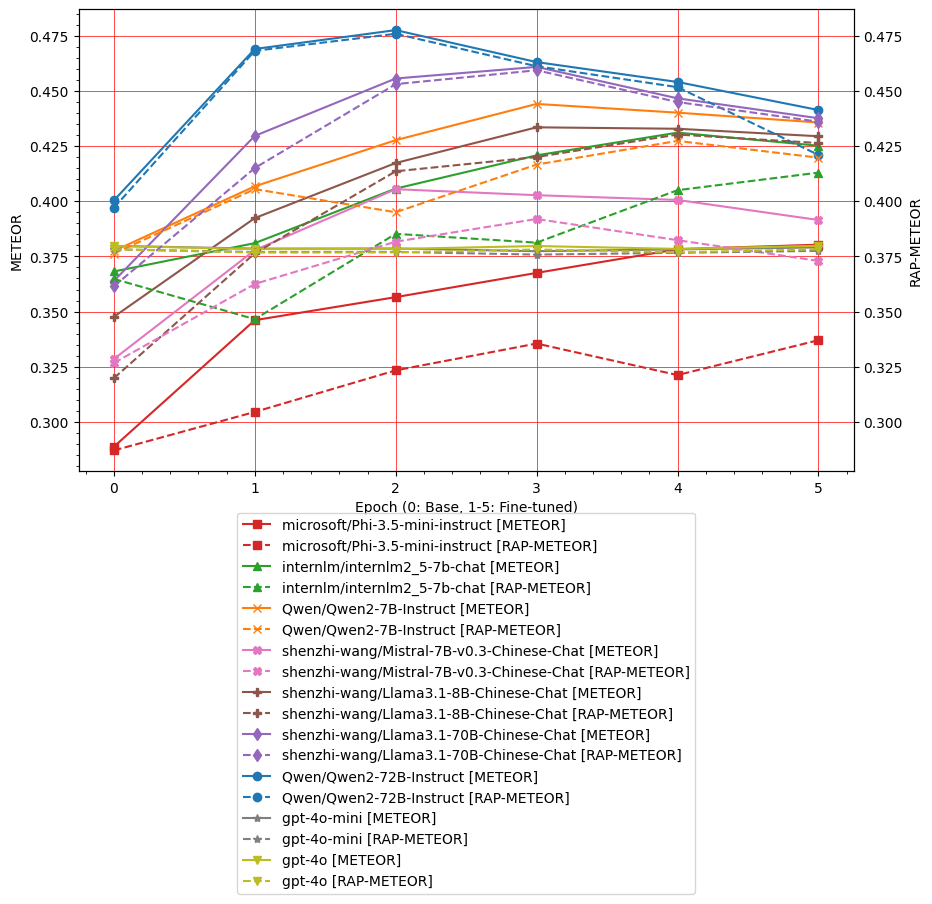

In [250]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

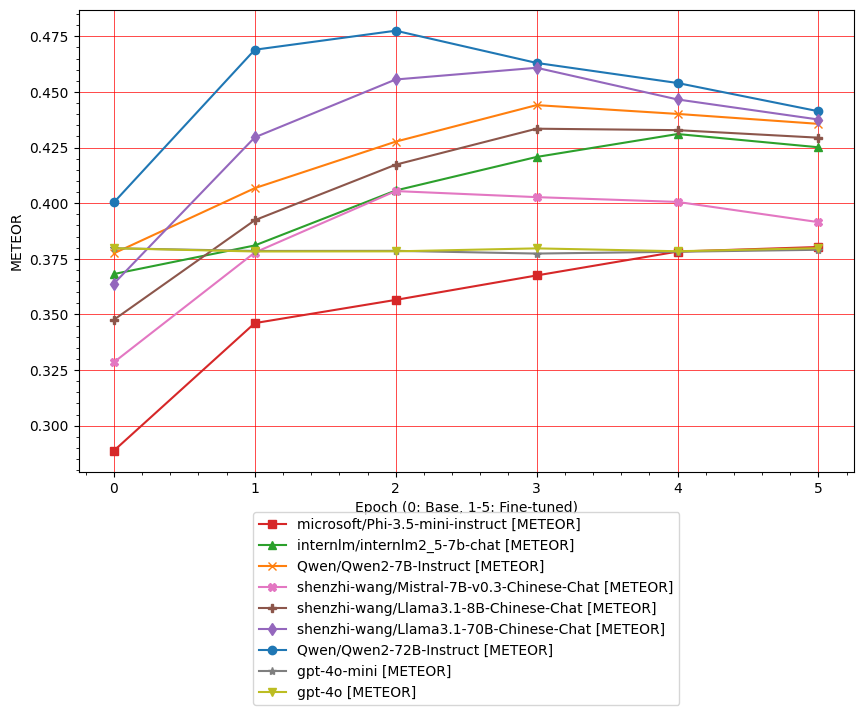

In [251]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

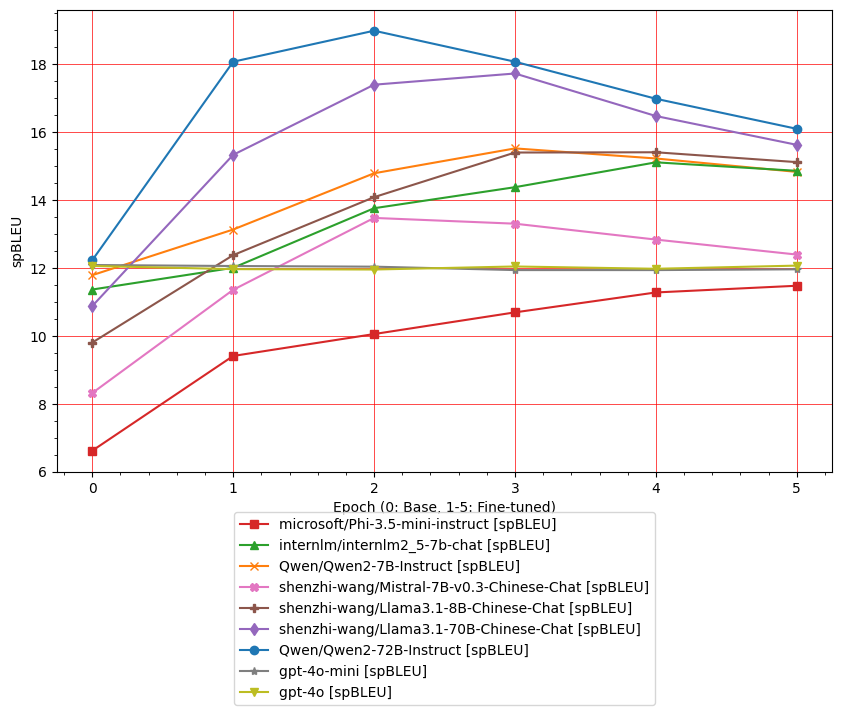

In [252]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

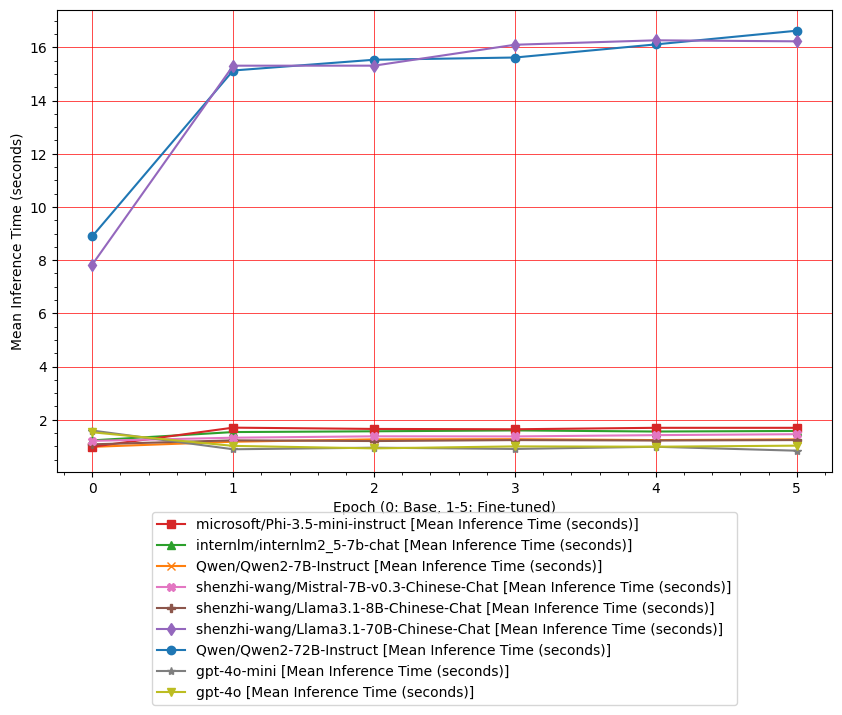

In [253]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    # log_scales=[True],
)

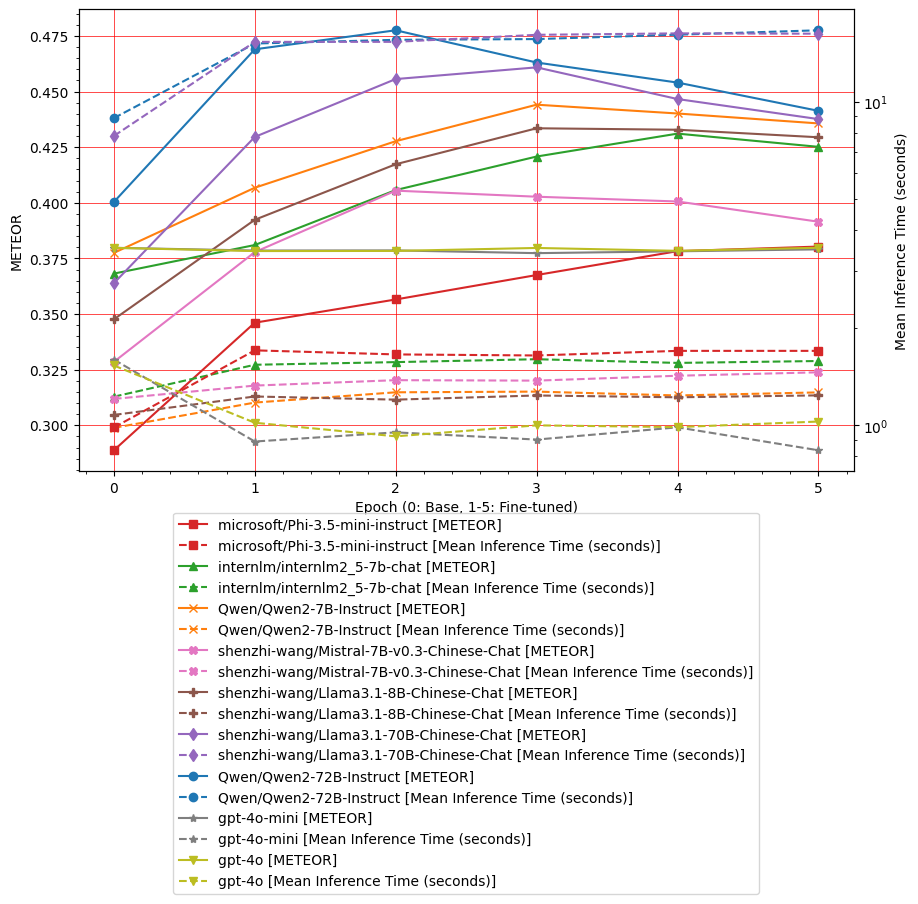

In [254]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    log_scales=[False, True],
)

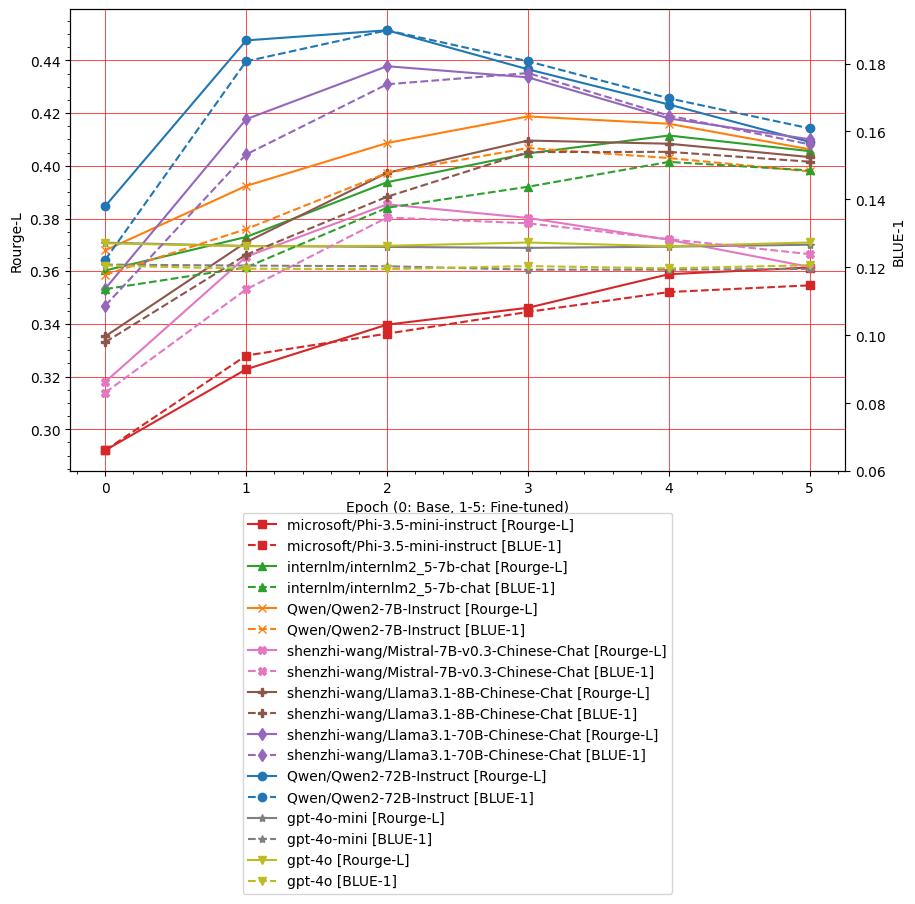

In [255]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

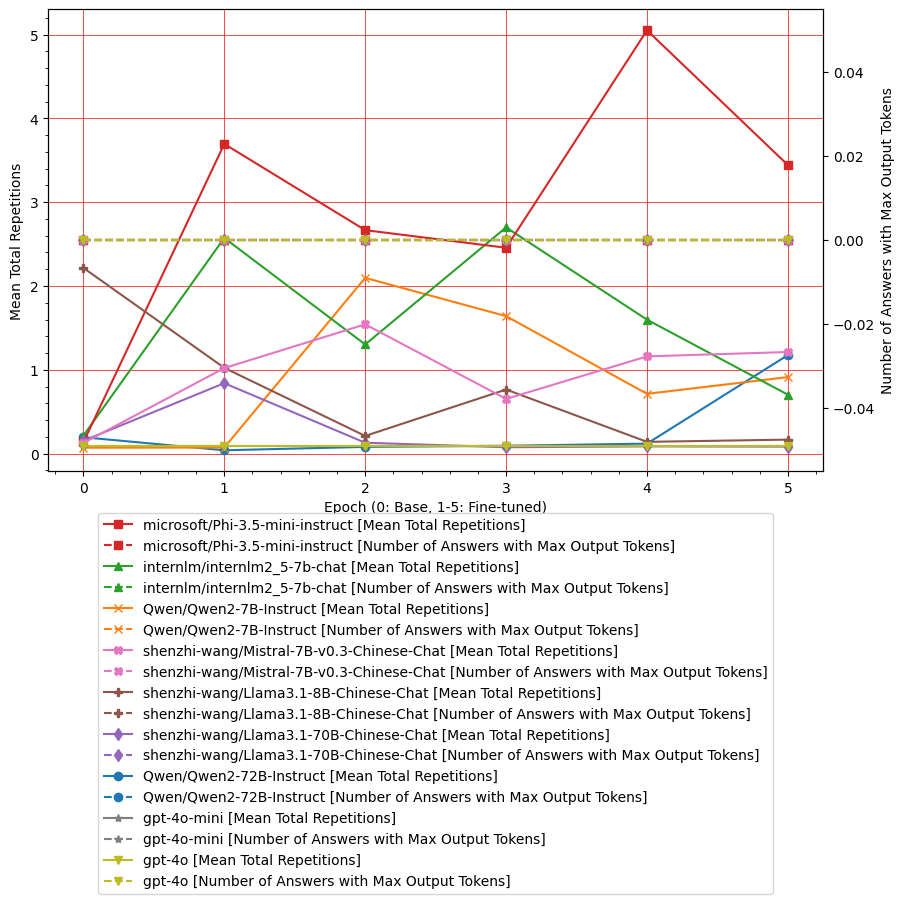

In [256]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

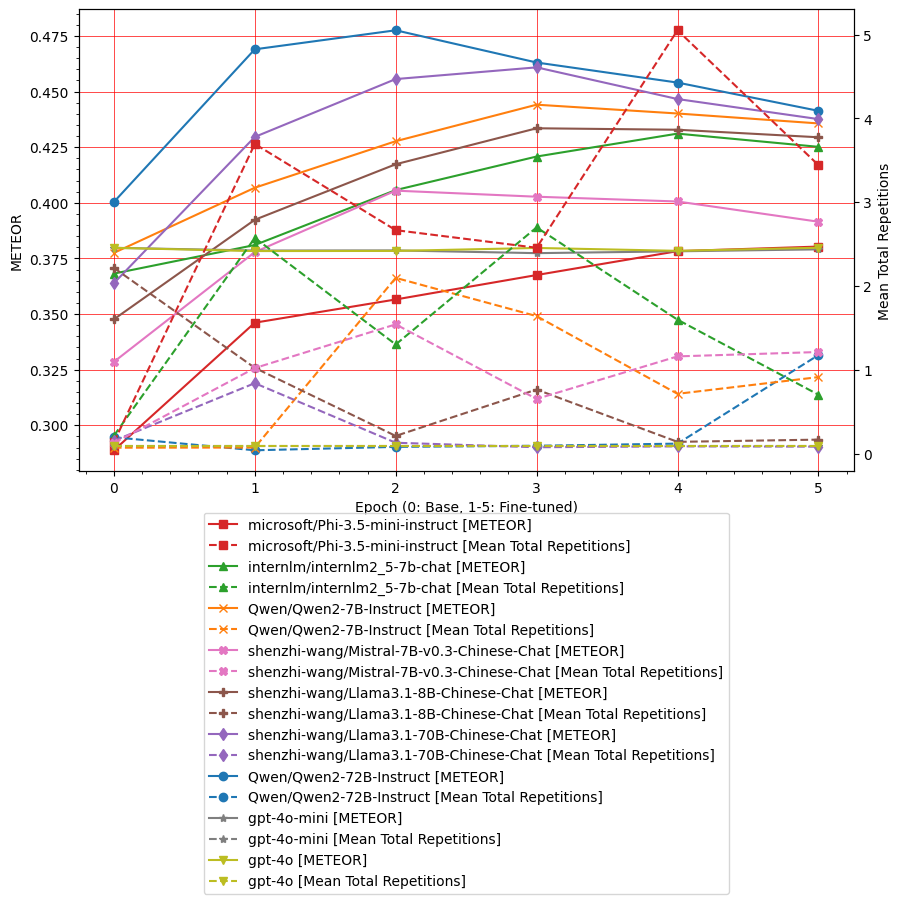

In [257]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

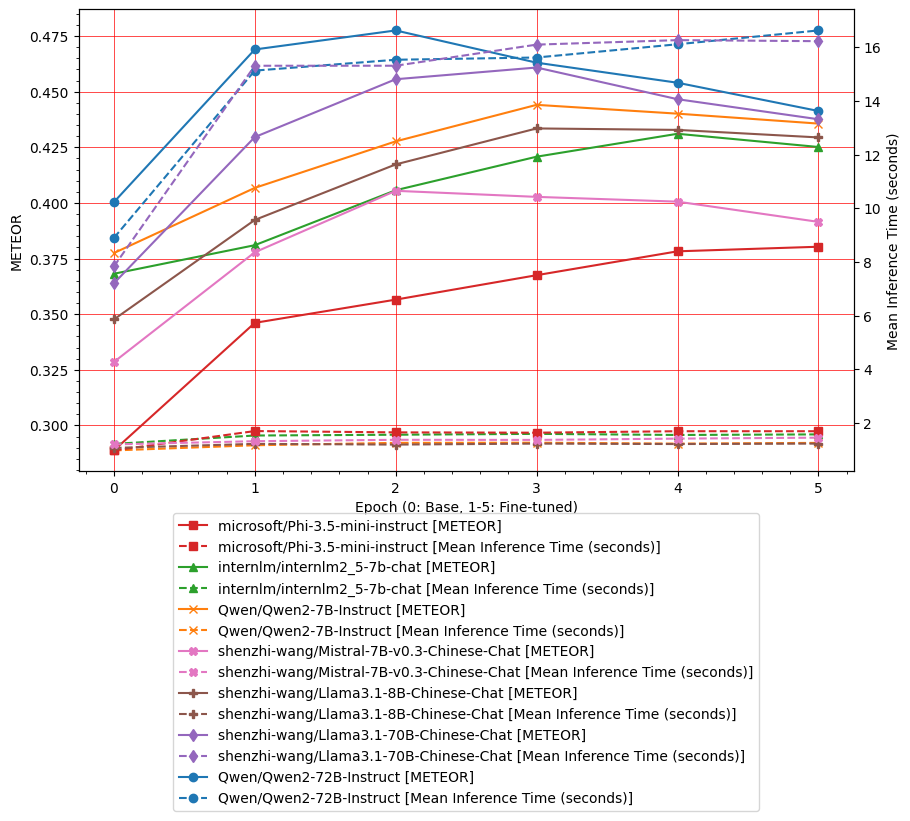

In [270]:
plot_metrics_vs_shots(
    metrics_df,
    models[:-2],
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    bbox_to_anchor=(0.5, -0.75),
)

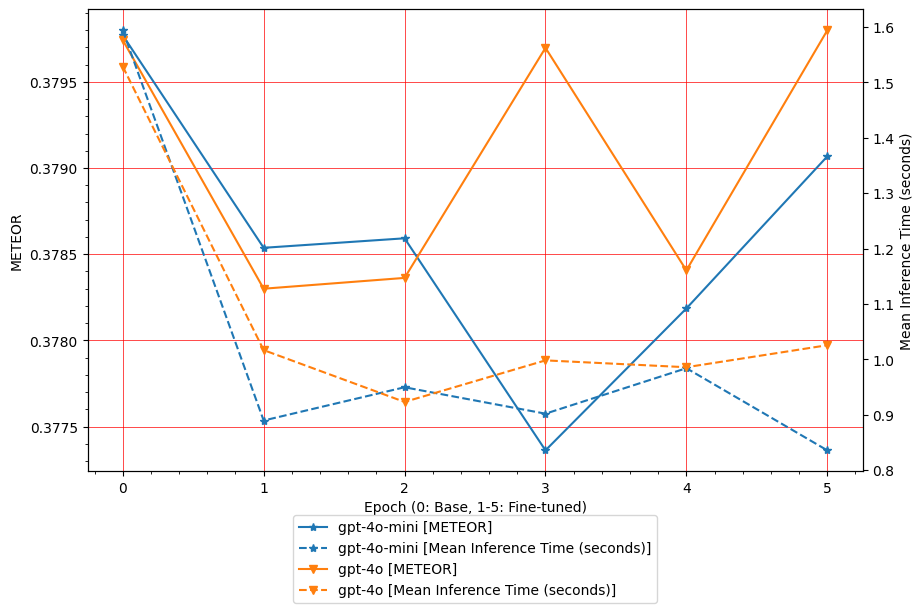

In [258]:
plot_metrics_vs_shots(
    metrics_df,
    ["gpt-4o-mini", "gpt-4o"],
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    bbox_to_anchor=(0.5, -0.3),
)

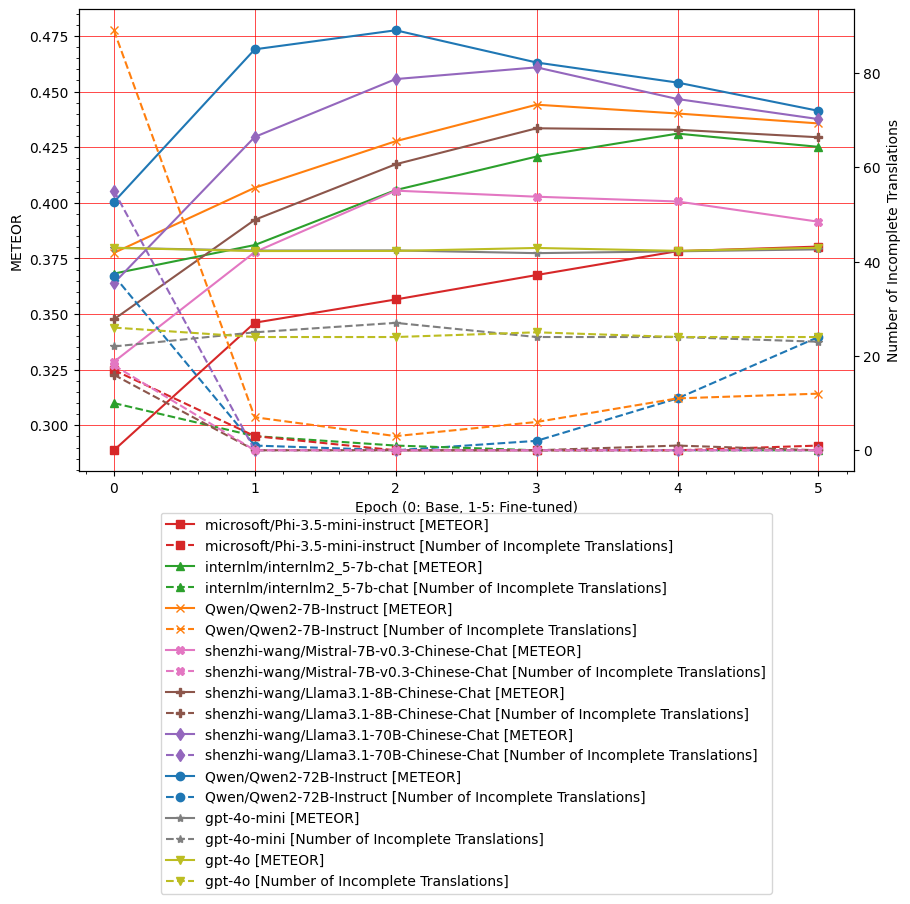

In [259]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "num_incomplete_translations"],
    ["METEOR", "Number of Incomplete Translations"],
)

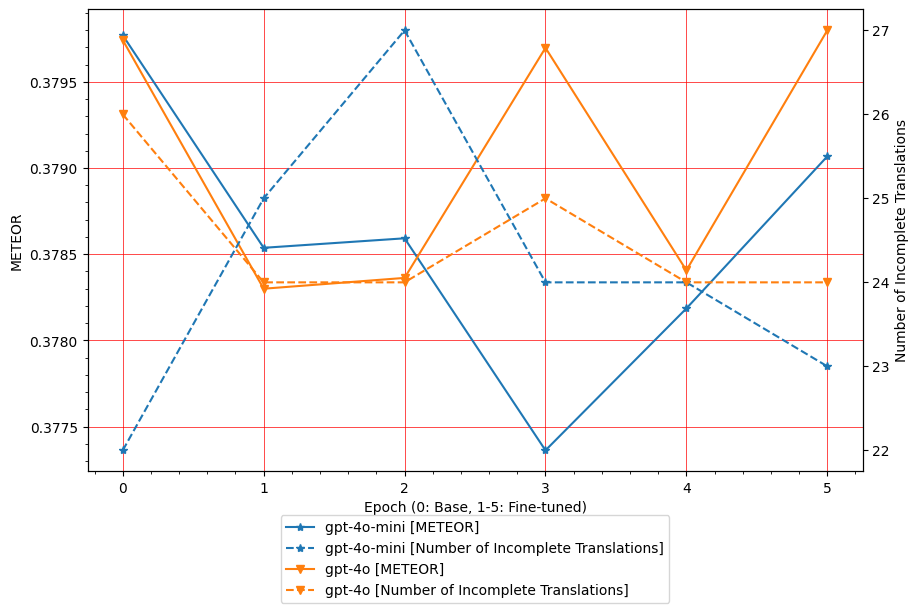

In [260]:
plot_metrics_vs_shots(
    metrics_df,
    ["gpt-4o-mini", "gpt-4o"],
    markers,
    ["meteor", "num_incomplete_translations"],
    ["METEOR", "Number of Incomplete Translations"],
    bbox_to_anchor=(0.5, -0.3),
)

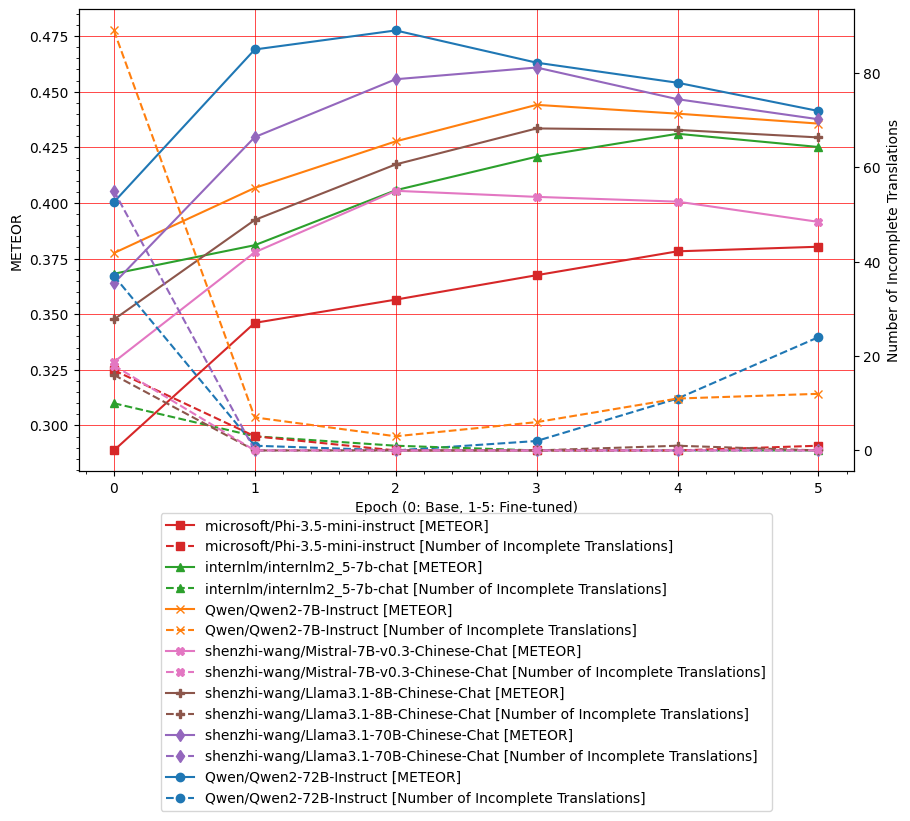

In [269]:
plot_metrics_vs_shots(
    metrics_df,
    models[:-2],
    markers,
    ["meteor", "num_incomplete_translations"],
    ["METEOR", "Number of Incomplete Translations"],
    bbox_to_anchor=(0.5, -0.75),
)

In [261]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/epochs-01
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 1 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/epochs-01
--------------------------------------------------
chinese: 天地会的会众多是江湖豪杰，赌钱酗酒，乃是天性，向来不以为非，总舵主也就不再理会，向他凝视片刻，道：“你愿不愿拜我为师？”
--------------------------------------------------
english: Since most members of the Society came from a travelling background in which gambling and drunken brawling were accepted as normal behaviour, the Helmsman was inclined to turn a blind eye on these matters. He looked at Trinket intently for some moments as if trying to make his mind up about something. 'Would you like to be my apprentice?'
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/epochs-01: The Triads were mostly made up of men who had spent their lives in the world of the江湖, and ga

In [262]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [263]:
metrics_df.describe()

epochs     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  62.000000  62.000000  62.000000  62.000000  62.000000       62.0   
mean    2.951613   0.403032  13.353383   0.133534   0.384707        0.0   
std     1.995301   0.036983   2.473441   0.024734   0.031785        0.0   
min     0.000000   0.288749   6.616686   0.066167   0.292031        0.0   
25%     1.000000   0.378439  11.937434   0.119374   0.368939        0.0   
50%     3.000000   0.400474  12.610388   0.126104   0.376599        0.0   
75%     5.000000   0.432403  15.109030   0.151090   0.408285        0.0   
max     6.000000   0.477542  18.979032   0.189790   0.451435        0.0   

       repetition_score  total_repetitions        rap  \
count         62.000000          62.000000  62.000000   
mean           0.868562           0.868562   0.390682   
std            1.157866           1.157866   0.041697   
min            0.040600           0.040600   0.287066   
25%            0.095322           0.095322   0.375939   
50%            0.181818           0.181818   0.381452   
75%            1.203663           1.203663   0.420758   
max            5.050309           5.050309   0.475871   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    62.000000                   62.0  62.000000  
mean                     11.145161                    0.0   4.352661  
std                      15.995744                    0.0   5.877535  
min                       0.000000                    0.0   0.832304  
25%                       0.000000                    0.0   1.200132  
50%                       2.500000                    0.0   1.398941  
75%                      23.750000                    0.0   1.700353  
max                      89.000000                    0.0  16.712268